<a href="https://colab.research.google.com/github/RiteshopShrivastava/Customer_Behavior_Analysis/blob/main/Customer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content**

Attributes

**People**

●	ID: Customer's unique identifier

●	Year_Birth: Customer's birth year

●	Education: Customer's education level

●	Marital_Status: Customer's marital status

●	Income: Customer's yearly household income

●	Kidhome: Number of children in customer's household

●	Teenhome: Number of teenagers in customer's household

●	Dt_Customer: Date of customer's enrollment with the company

●	Recency: Number of days since customer's last purchase

●	Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

●	MntWines: Amount spent on wine in last 2 years

●	MntFruits: Amount spent on fruits in last 2 years

●	MntMeatProducts: Amount spent on meat in last 2 years

●	MntFishProducts: Amount spent on fish in last 2 years

●	MntSweetProducts: Amount spent on sweets in last 2 years

●	MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

●	NumDealsPurchases: Number of purchases made with a discount

●	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

●	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

●	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

●	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

●	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

●	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

●	NumWebPurchases: Number of purchases made through the company’s web site

●	NumCatalogPurchases: Number of purchases made using a catalogue

●	NumStorePurchases: Number of purchases made directly in stores

●	NumWebVisitsMonth: Number of visits to company’s web site in the last month

**Target - Need to perform clustering to summarize customer segments.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/marketing_campaign.csv')
print('Total number of data points are:', len(data))

Total number of data points are: 2240


In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# **EDA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Descriptive statistics
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


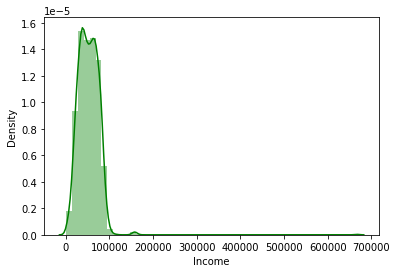

In [6]:
# Distribution plot for 'Income'
sns.distplot(data['Income'], color='green');

**Income is right skewed , Most of the customers Income lies in between 0- 100000**

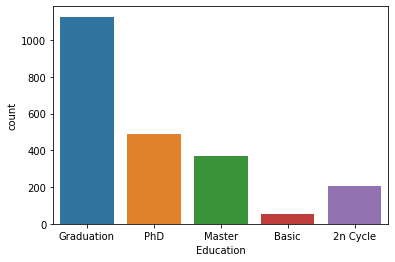

In [7]:
# Countplot for 'Education'
sns.countplot(x=data['Education']);

**Most of the customers are having education as Undergraduate**

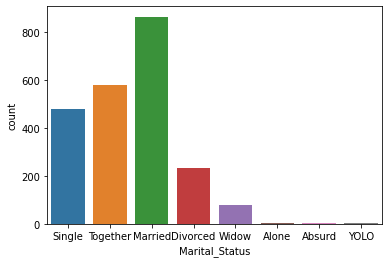

In [8]:
# Countplot for 'Marital_Status'
sns.countplot(x=data['Marital_Status']);

**Customers who are married or living Together are big target**

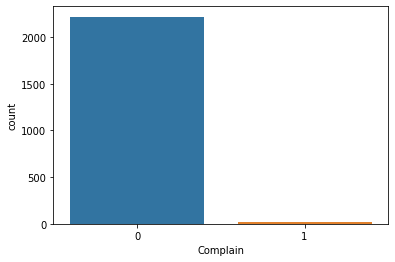

In [9]:
# Countplot for  'Complain'
sns.countplot(x=data['Complain'])

**Very few customers have complain**

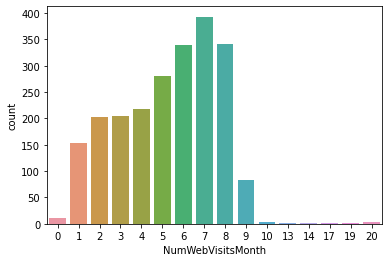

In [10]:
sns.countplot(x=data['NumWebVisitsMonth'])

**Most of the customers visited company website in between 6 to 8 times**

**Checking for Null values**

In [11]:
#'Income' column is having null values
data[data.isnull().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


In [12]:
# Either we can drop null values or null values can be imputed, here we are droping null values

data1= data.dropna()
print('Total number of data points after dropping null values are:', len(data1))
data1.head()

Total number of data points after dropping null values are: 2216


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Cehcking for duplicate rows**

In [13]:
data1 = data1.reset_index()

In [14]:
data1

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2212,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2213,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2214,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [15]:
#Checking for duplicate rows
data1[data1.duplicated()].shape

(0, 30)

**There are no duplicate records**

**Changing Datatypes**

In [16]:
# Some of the datatypes are not appropriate,so we will convert it
data1['Dt_Customer'] = pd.to_datetime(data1['Dt_Customer'], errors='coerce')

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                2216 non-null   int64         
 1   ID                   2216 non-null   int64         
 2   Year_Birth           2216 non-null   int64         
 3   Education            2216 non-null   object        
 4   Marital_Status       2216 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2216 non-null   int64         
 7   Teenhome             2216 non-null   int64         
 8   Dt_Customer          2216 non-null   datetime64[ns]
 9   Recency              2216 non-null   int64         
 10  MntWines             2216 non-null   int64         
 11  MntFruits            2216 non-null   int64         
 12  MntMeatProducts      2216 non-null   int64         
 13  MntFishProducts      2216 non-nul

**Checking Categorical features and re-defining categories**

Checking values of 'Education' and 'Marital_Status' column

In [18]:
print('Different categories in Education are:\n',data1['Education'].value_counts(),'\n')

print('Different categories in Marital_Status are:\n', data1['Marital_Status'].value_counts())

Different categories in Education are:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Different categories in Marital_Status are:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


**For 'Education', we will consider 'Graduation' as 'UnderGraduate' and '2n Cycle' as  'Master'**

In [19]:
# for 'Education' column, we will consider 'Graduation' as 'UnderGraduate' and '2n Cycle' as  'Master'
data1['Education'] = data1['Education'].replace({'Graduation':'UnderGraduate','2n Cycle': 'Master'})

In [20]:
data1['Education'].value_counts()

UnderGraduate    1116
Master            565
PhD               481
Basic              54
Name: Education, dtype: int64

**Similarly for 'Marital_Status', 'Married' can be termed as 'Together' and 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO' as 'Single**

In [21]:
data1['Marital_Status'] = data1['Marital_Status'].replace({'Married':'Together','Divorced': 'Single', 'Widow': 'Single',
                                                         'Alone': 'Single','Absurd': 'Single', 'YOLO': 'Single'})

In [22]:
data1['Marital_Status'].value_counts()

Together    1430
Single       786
Name: Marital_Status, dtype: int64

# **Feature Engineering**

**Creating some new features from existing features**

Age (Age of customer) is drived from 'Year_Birth'

Children = Kidhome	+ Teenhome

Total_spent= MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds

Total_no_purchase = NumCatalogPurchases + NumDealsPurchases + NumStorePurchases+ NumWebPurchases

In [23]:
data1['Age']= 2021- data1['Year_Birth']
data1['Children']= data1['Kidhome']+data1['Teenhome']
data1['Total_spent']= data1['MntWines']+data1['MntFruits']+data1['MntMeatProducts']+data1['MntFishProducts']+data1['MntSweetProducts']+data1['MntGoldProds']
data1['Total_no_purchase'] = data1['NumCatalogPurchases']+data1['NumDealsPurchases']+data1['NumStorePurchases']+data1['NumWebPurchases']
data1["TotalAcceptedCmp"] = data1['AcceptedCmp1'] + data1['AcceptedCmp2'] + data1['AcceptedCmp3'] + data1['AcceptedCmp4'] + data1['AcceptedCmp5'] + data1['Response']


In [24]:
data1.head(11)

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp
0,0,5524,1957,UnderGraduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0,1617,25,1
1,1,2174,1954,UnderGraduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2,27,6,0
2,2,4141,1965,UnderGraduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,0,776,21,0
3,3,6182,1984,UnderGraduate,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1,53,8,0
4,4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,1,422,19,0
5,5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,54,1,716,22,0
6,6,965,1971,UnderGraduate,Single,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,50,1,590,21,0
7,7,6177,1985,PhD,Together,33454.0,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,36,1,169,10,0
8,8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,47,1,46,6,1
9,9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,71,2,49,2,1


**Renaming column names**

In [26]:
data1=data1.rename(columns={"MntWines": "Spent_Wines","MntFruits":"Spent_Fruits","MntMeatProducts":"Spent_Meat",
                          "MntFishProducts":"Spent_Fish","MntSweetProducts":"Spent_Sweets","MntGoldProds":"Spent_Gold"})

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                2216 non-null   int64         
 1   ID                   2216 non-null   int64         
 2   Year_Birth           2216 non-null   int64         
 3   Education            2216 non-null   object        
 4   Marital_Status       2216 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2216 non-null   int64         
 7   Teenhome             2216 non-null   int64         
 8   Dt_Customer          2216 non-null   datetime64[ns]
 9   Recency              2216 non-null   int64         
 10  Spent_Wines          2216 non-null   int64         
 11  Spent_Fruits         2216 non-null   int64         
 12  Spent_Meat           2216 non-null   int64         
 13  Spent_Fish           2216 non-nul

**Dropping unwanted columns**

'index','ID','Dt_Customer','Year_Birth','Z_CostContact','Z_Revenue'

In [28]:
data1 = data1.drop(columns=({'index','ID','Dt_Customer','Year_Birth','Z_CostContact','Z_Revenue'}))

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   Spent_Wines          2216 non-null   int64  
 7   Spent_Fruits         2216 non-null   int64  
 8   Spent_Meat           2216 non-null   int64  
 9   Spent_Fish           2216 non-null   int64  
 10  Spent_Sweets         2216 non-null   int64  
 11  Spent_Gold           2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

**Preprocessing - Label Encoding**

In [30]:
data1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp
0,UnderGraduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1
1,UnderGraduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0
2,UnderGraduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0
3,UnderGraduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0
4,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0


In [31]:
data2 = data1.copy()

In [32]:
data2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp
0,UnderGraduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1
1,UnderGraduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0
2,UnderGraduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0
3,UnderGraduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0
4,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['Education']= label_encoder.fit_transform(data2['Education'])
data2['Marital_Status']= label_encoder.fit_transform(data2['Marital_Status'])

In [34]:
data2.head(11)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp
0,3,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1
1,3,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0
2,3,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0
3,3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0
4,2,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0
5,1,1,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,54,1,716,22,0
6,3,0,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,50,1,590,21,0
7,2,1,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,36,1,169,10,0
8,2,1,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,47,1,46,6,1
9,2,1,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,71,2,49,2,1


**Outlier Detection**

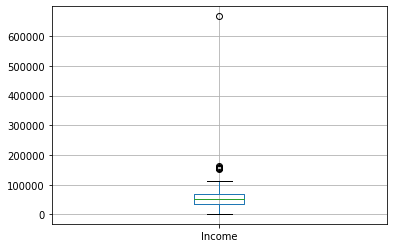

In [35]:
data2.boxplot(column='Income')

**Income is having some outliers which are to be treated**

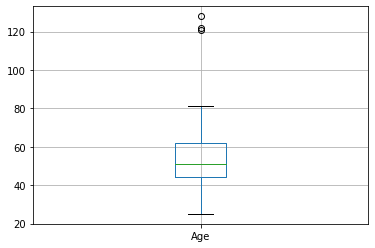

In [36]:
data2.boxplot(column='Age')

**Age is having some outliers, Usually age cannot be more than 100 years**

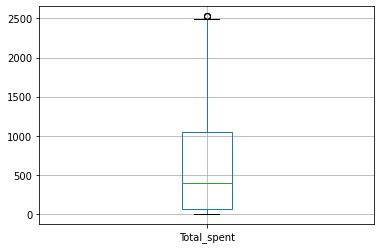

In [37]:
data2.boxplot(column='Total_spent')

**Total_spent is also having some outliers**

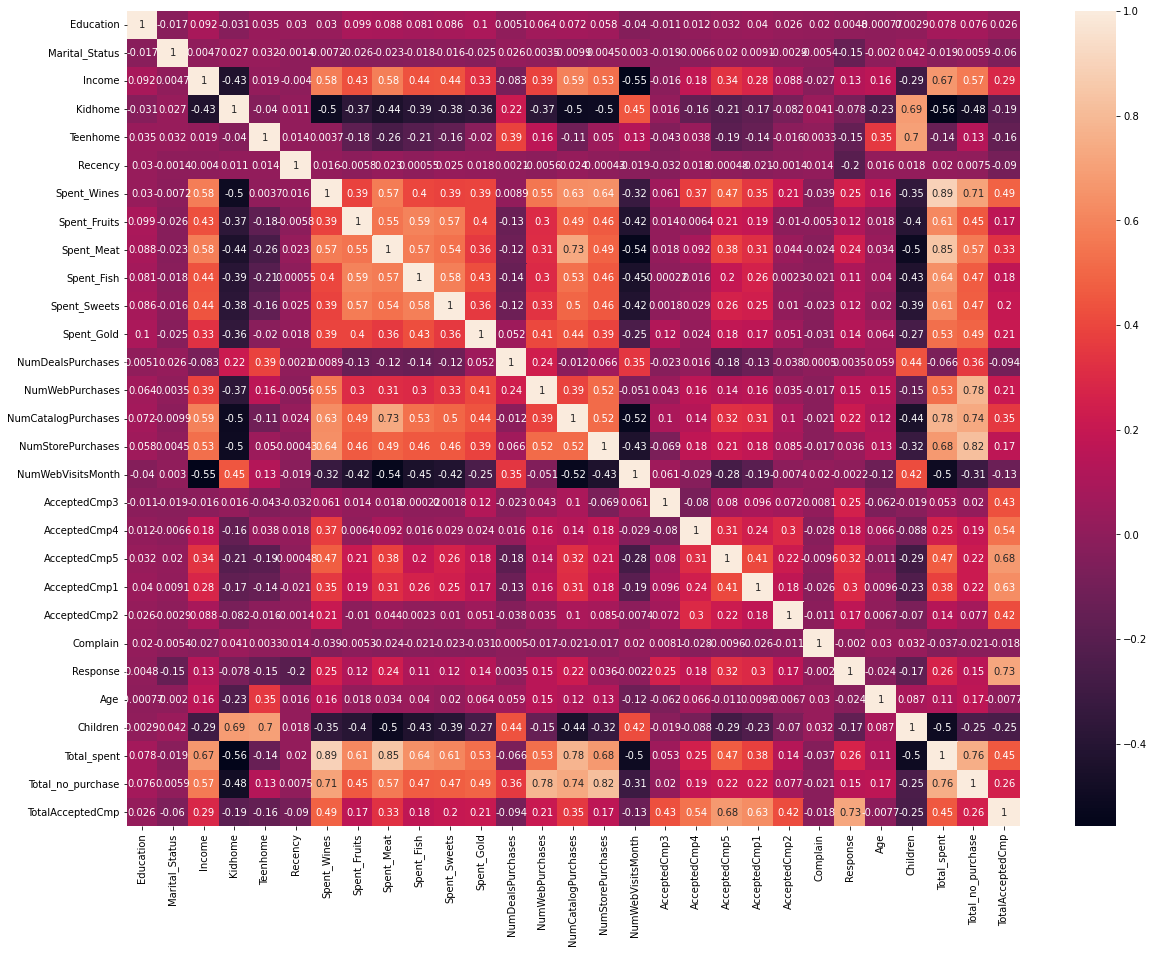

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
rescaled = scaler.fit_transform(data2)
rescaled

array([[ 0.88566974, -1.34882854,  0.2340627 , ...,  1.67548812,
         1.31944644,  0.61804539],
       [ 0.88566974, -1.34882854, -0.23455948, ..., -0.96235832,
        -1.15798724, -0.50273087],
       [ 0.88566974,  0.74138408,  0.76947764, ...,  0.28024985,
         0.79788146, -0.50273087],
       ...,
       [ 0.88566974, -1.34882854,  0.18809052, ...,  1.05169551,
         0.53709896,  0.61804539],
       [-1.32825485,  0.74138408,  0.67538765, ...,  0.39140438,
         1.05866395, -0.50273087],
       [-0.22129255,  0.74138408,  0.02470453, ..., -0.7218    ,
        -0.50603101,  0.61804539]])

In [41]:
# creating dataframe of scaled values 
rescaled_df = pd.DataFrame(rescaled, columns=data2.columns)
rescaled_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp
0,0.885670,-1.348829,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,-1.264803,1.675488,1.319446,0.618045
1,0.885670,-1.348829,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,1.405806,-0.962358,-1.157987,-0.502731
2,0.885670,0.741384,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,-1.264803,0.280250,0.797881,-0.502731
3,0.885670,0.741384,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,0.070501,-0.919224,-0.897205,-0.502731
4,-0.221293,0.741384,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,0.070501,-0.307044,0.537099,-0.502731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.885670,0.741384,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.151917,0.070501,1.217598,0.406708,-0.502731
2212,-0.221293,0.741384,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,-0.420530,1.904422,2.741110,-0.270546,0.928273,0.618045
2213,0.885670,-1.348829,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-1.264803,1.051696,0.537099,0.618045
2214,-1.328255,0.741384,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.069896,0.070501,0.391404,1.058664,-0.502731


# Dimensionality reduction

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=15)
pca_values = pca.fit_transform(rescaled)

In [44]:
pca_values

array([[ 4.59165058, -0.18860879, -0.31963164, ...,  2.56068568,
        -1.03838441, -0.32993248],
       [-3.05470702, -0.16042265,  0.25603719, ...,  0.17770869,
         0.10415348,  0.14999409],
       [ 1.87187739, -1.01820092, -1.2531398 , ..., -0.2710206 ,
         0.06219595, -0.57883179],
       ...,
       [ 2.20818038,  0.80159228,  0.0620103 , ..., -1.22504627,
        -1.18047792, -0.97203047],
       [ 1.73576512, -1.94869204,  0.04464598, ..., -0.19445931,
         0.29112397,  0.06636186],
       [-1.99495293,  0.51099289,  1.90875748, ...,  1.2977146 ,
        -0.77460552,  0.24413756]])

In [45]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.2988159 , 0.09331487, 0.0855351 , 0.04993655, 0.03952977,
       0.03846168, 0.03560454, 0.03450501, 0.03410932, 0.03269209,
       0.02768982, 0.02660996, 0.02329862, 0.02144778, 0.0211729 ])

In [46]:
# Cumulative variance 
cum_var = np.cumsum(np.round(var,decimals = 4)*100)
cum_var

array([29.88, 39.21, 47.76, 52.75, 56.7 , 60.55, 64.11, 67.56, 70.97,
       74.24, 77.01, 79.67, 82.  , 84.14, 86.26])

In [ ]:
pca.components_

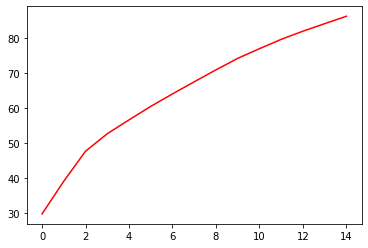

In [48]:
# Variance plot for PCA components obtained 
plt.plot(cum_var,color="red")

In [49]:
#Creating dataframe of PC values
pca_df = pd.DataFrame(pca_values, columns=('pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15',))
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,4.591651,-0.188609,-0.319632,2.226966,0.657679,-0.191556,1.709314,-0.459923,-0.209306,-0.301957,-0.770185,-0.810357,2.560686,-1.038384,-0.329932
1,-3.054707,-0.160423,0.256037,-0.773277,1.637200,1.267042,0.724243,-1.176314,-0.524642,-0.445279,0.162437,0.123263,0.177709,0.104153,0.149994
2,1.871877,-1.018201,-1.253140,-0.148620,-0.146498,-0.838473,-0.133111,-0.386766,0.358762,1.737951,-0.413261,-0.023528,-0.271021,0.062196,-0.578832
3,-2.796828,0.864833,-0.980980,0.437123,-1.031220,0.145878,-0.403380,-0.913795,0.335140,1.013359,-0.031983,0.436218,-0.122589,0.169551,-0.072419
4,-0.472517,-0.813485,-0.357504,0.721641,-2.170879,0.478630,-0.234248,0.536159,0.062031,-0.808450,0.145325,0.317767,0.570673,-0.054764,-0.485287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2.451415,-2.071389,0.134748,0.939572,-0.027405,0.444110,0.040224,0.411175,-0.724350,1.713298,-0.222898,-1.626928,-0.875785,-0.214946,2.239137
2212,-1.093973,-1.025277,4.182559,0.168731,-0.526129,2.063544,-1.792396,-0.630777,0.231454,-1.732708,-1.142827,-1.361575,0.763897,2.713749,-1.076823
2213,2.208180,0.801592,0.062010,-1.704515,-2.067604,-0.940977,2.682840,-0.021990,-0.170409,-0.063495,-0.472862,1.030666,-1.225046,-1.180478,-0.972030
2214,1.735765,-1.948692,0.044646,-0.705934,1.198867,-1.203545,-1.575094,-0.102565,0.514613,0.042128,0.629671,-0.102810,-0.194459,0.291124,0.066362


In [50]:
pca_df.describe()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,-1.603210e-16,-3.141290e-17,6.312640e-17,-1.289582e-16,1.110223e-16,6.963944e-18,1.222949e-16,-9.088198e-17,-1.376130e-16,-1.931367e-17,-2.980969e-17,-9.140803e-17,-3.026059e-17,1.028560e-16,-5.822909e-17
std,2.944414e+00,1.645404e+00,1.575322e+00,1.203667e+00,1.070925e+00,1.056358e+00,1.016365e+00,1.000548e+00,9.947950e-01,9.739090e-01,8.963077e-01,8.786565e-01,8.221710e-01,7.888386e-01,7.837673e-01
min,-5.015416e+00,-4.834507e+00,-3.964731e+00,-4.552621e+00,-3.471213e+00,-3.091817e+00,-3.062773e+00,-3.723761e+00,-2.355808e+00,-3.636991e+00,-2.794712e+00,-3.762112e+00,-3.251174e+00,-3.538700e+00,-3.412527e+00
25%,-2.654496e+00,-1.051568e+00,-1.070847e+00,-7.236404e-01,-7.434407e-01,-7.166856e-01,-7.509166e-01,-6.724470e-01,-3.904045e-01,-6.242959e-01,-4.193058e-01,-4.144647e-01,-4.805841e-01,-3.206136e-01,-3.730199e-01
50%,-7.366176e-01,-9.962531e-02,-1.488129e-01,-3.459581e-02,-1.696501e-02,9.956811e-03,-1.269582e-01,-9.493682e-02,-5.883713e-02,2.290858e-02,-3.324012e-02,7.203262e-03,-2.312158e-02,2.656415e-02,-1.573401e-03
75%,2.329722e+00,9.265044e-01,8.578116e-01,6.587317e-01,7.027361e-01,6.773772e-01,7.497847e-01,5.759578e-01,2.667594e-01,6.572416e-01,3.743596e-01,4.582030e-01,4.461449e-01,3.170490e-01,2.738117e-01
max,9.244262e+00,8.373557e+00,6.983583e+00,5.224923e+00,5.227817e+00,5.109300e+00,3.484595e+00,4.776296e+00,9.839059e+00,3.935576e+00,6.954017e+00,7.085899e+00,7.567377e+00,3.800778e+00,3.822804e+00


# **Model Building**

# **Heirarchical Clustering**

In [51]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

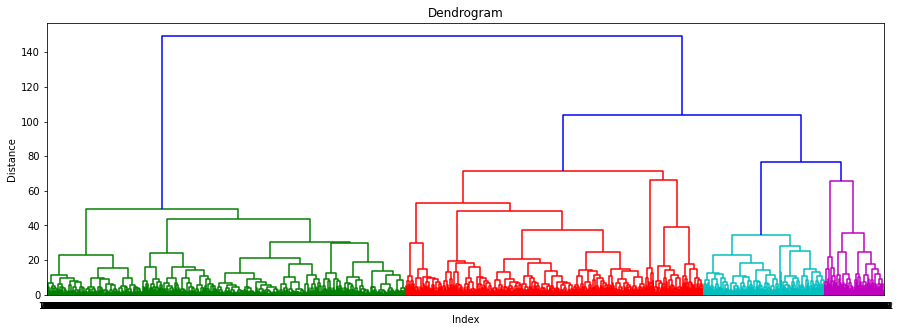

In [52]:
from scipy.cluster.hierarchy import linkage

Z = linkage(pca_df, method='ward', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(Z, leaf_rotation=0, leaf_font_size=8, color_threshold=75)

plt.show()

In [53]:
h_clusters = AgglomerativeClustering(n_clusters= 4, affinity= 'euclidean', linkage= "complete").fit(pca_df)
#pd.Series(h_clusters.labels_)
h_clusters.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [54]:
data1['h_clust']= h_clusters.labels_
data1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp,h_clust
0,UnderGraduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1,0
1,UnderGraduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0,1
2,UnderGraduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0,0
3,UnderGraduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0,1
4,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,UnderGraduate,Together,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54,1,1341,18,0,0
2212,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75,3,444,22,1,1
2213,UnderGraduate,Single,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40,0,1241,19,1,1
2214,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,65,1,843,23,0,1


In [55]:
data1['h_clust'].value_counts()

1    1588
0     602
3      21
2       5
Name: h_clust, dtype: int64

# **K-Means Clustering**

In [56]:
pca_kmeans = pca_df

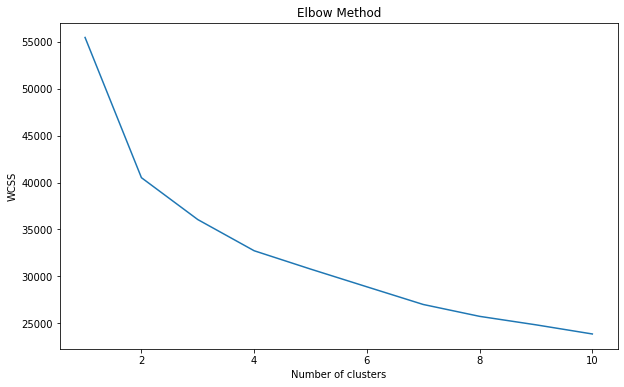

In [57]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(pca_values)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
# Building cluster algorithm
km_clusters = KMeans(n_clusters=4, random_state= 0)
km_clusters.fit(pca_values)

KMeans(n_clusters=4, random_state=0)

In [59]:
km_clusters.labels_

array([3, 1, 3, ..., 3, 0, 1], dtype=int32)

In [60]:
data1['km_clust'] = km_clusters.labels_
data1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp,h_clust,km_clust
0,UnderGraduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1,0,3
1,UnderGraduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0,1,1
2,UnderGraduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0,0,3
3,UnderGraduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0,1,1
4,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0,1,0


In [61]:
data1['km_clust'].value_counts()

1    1045
0     565
3     451
2     155
Name: km_clust, dtype: int64

# **DBSCAN**

In [62]:
from sklearn.cluster import DBSCAN
# build DBSCAN algorithm
db_clusters = DBSCAN(eps=5, min_samples=16)
db_clusters.fit(rescaled)

DBSCAN(eps=5, min_samples=16)

In [63]:
# Identifying clusters & noisy data, -1 represents noise
db_clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
data1['db_clust'] = db_clusters.labels_

In [65]:
data1['db_clust'].value_counts()

 0    2042
-1     174
Name: db_clust, dtype: int64

In [66]:
data1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp,h_clust,km_clust,db_clust
0,UnderGraduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1,0,3,0
1,UnderGraduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0,1,1,0
2,UnderGraduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0,0,3,0
3,UnderGraduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0,1,1,0
4,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0,1,0,0


In [67]:
Result= pd.DataFrame({"Hiearchical":h_clusters.labels_,"K-Means":km_clusters.labels_,"DBSCAN":db_clusters.labels_})
Result

,Hiearchical,K-Means,DBSCAN
0,0,3,0
1,1,1,0
2,0,3,0
3,1,1,0
4,1,0,0
...,...,...,...
2211,0,0,0
2212,1,0,0
2213,1,3,0
2214,1,0,0


# **Visualising clusters**

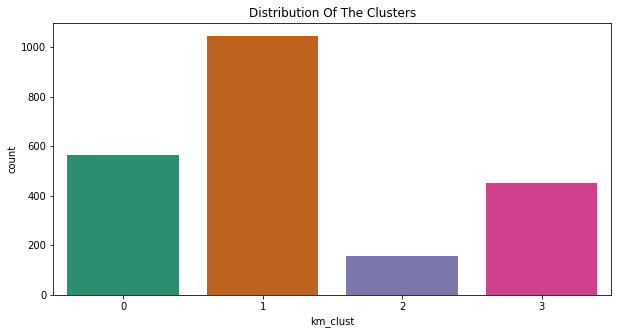

In [68]:
#Plotting countplot of clusters
plt.figure(figsize=(10,5))
pl = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data1["km_clust"], palette= 'Dark2')
pl.set_title("Distribution Of The Clusters")
plt.show()

**Most of the data points lie in cluster 1**

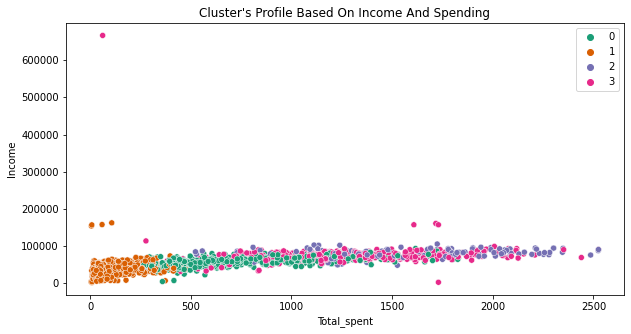

In [69]:
# Scatterplot between Total_spent & Income
plt.figure(figsize=(10,5))
pl = sns.scatterplot(data =data1, x=data1["Total_spent"], y=data1["Income"],hue=data1["km_clust"], palette= 'Dark2')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**cluster 0: Average income & average spending**

**cluster 1: Low income & low spending**

**cluster 2: High income & high spending**

**cluster 3: High income & average spending**

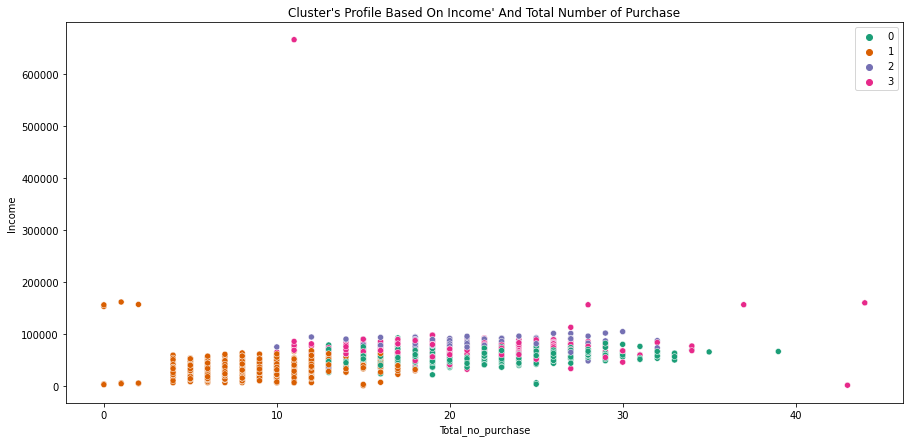

In [70]:
# Scatterplot between Total_no_purchase & Income
plt.figure(figsize=(15,7))
pl = sns.scatterplot(data =data1, x=data1["Total_no_purchase"], y=data1["Income"],hue=data1["km_clust"], palette= 'Dark2')
pl.set_title("Cluster's Profile Based On Income' And Total Number of Purchase")
plt.legend()
plt.show()

**cluster 0: Average income & more purchase**

**cluster 1: Low income & less no. of purchase**

**cluster 2: High income & average purchase** 

**cluster 3: High income & more purchase**

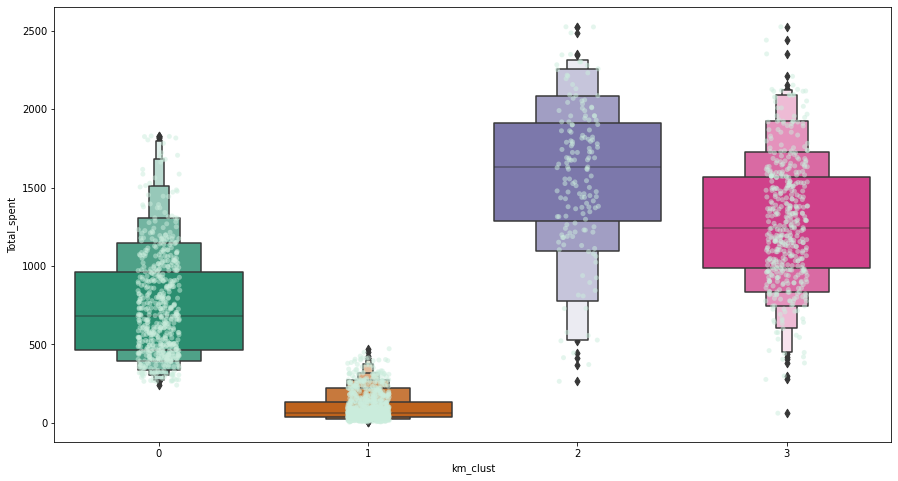

In [71]:
plt.figure(figsize=(15,8))
pl=sns.stripplot(x=data1["km_clust"], y=data1["Total_spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data1["km_clust"], y=data1["Total_spent"], palette='Dark2')
plt.show()

**From above plot it is clear Cluster-2 is having customers with highest spent followed by Cluster-3**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

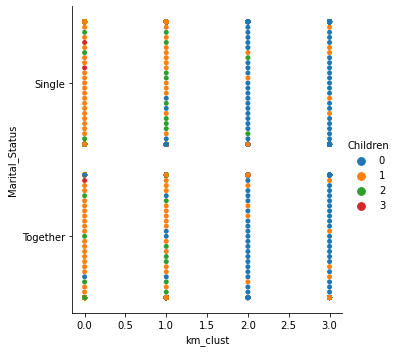

In [102]:
sns.catplot( y='Marital_Status',hue="Children",x="km_clust",kind="swarm", data=data1);

**From above plot it is clear that in Cluster-2 & Cluster-3 most of the customers are not having children.**

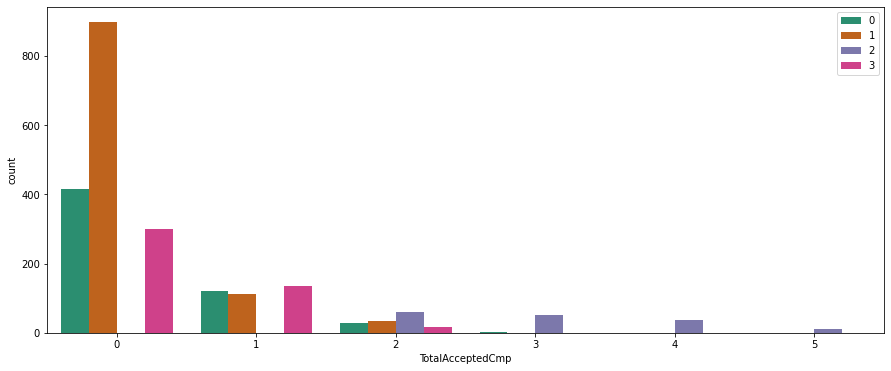

In [101]:
plt.figure(figsize=(15,6))
ax =sns.countplot(x=data1['TotalAcceptedCmp'], hue= data1['km_clust'], palette='Dark2');
ax.legend(loc='upper right')

**From above plot we can say Promotion campaigns does not effected customers**

**Categorizing age in groups**

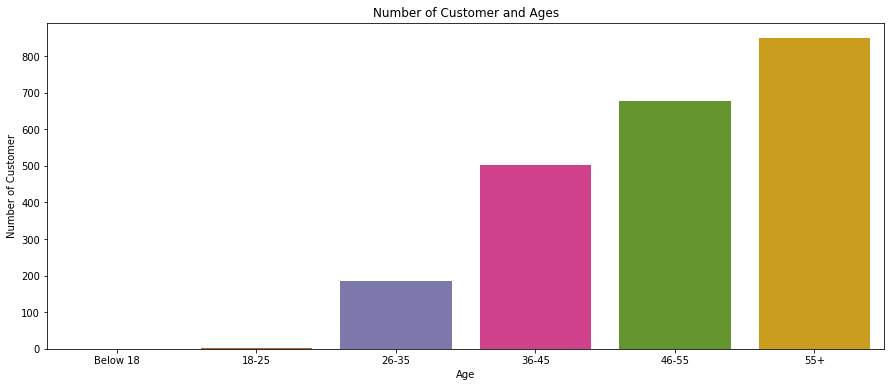

In [84]:
age18below = data1.Age[data1.Age < 18]
age18_25 = data1.Age[(data1.Age <= 25) & (data1.Age >= 18)]
age26_35 = data1.Age[(data1.Age <= 35) & (data1.Age >= 26)]
age36_45 = data1.Age[(data1.Age <= 45) & (data1.Age >= 36)]
age46_55 = data1.Age[(data1.Age <= 55) & (data1.Age >= 46)]
age55above = data1.Age[data1.Age >= 56]

x = ["Below 18","18-25","26-35","36-45","46-55","55+"]
y = [len(age18below.values),len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="Dark2")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

**Most of the customers are of age more than 45 years**

In [86]:
#creating and appending newly age_group column into original dataset
age_group=[]
for value in data1['Age']:
  if value < 18:
    age_group.append('age18below')
  elif value <=25 and value >=18:
    age_group.append('age18_25')
  elif value <=35 and value >=26:
    age_group.append('age26_35')
  elif value <=45 and value >=36:
    age_group.append('age36_45')
  elif value <=55 and value >=46:
    age_group.append('age46_55')
  else:
      age_group.append('age55above')
data1['Age_group']=age_group

In [99]:
data1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Spent_Wines,Spent_Fruits,Spent_Meat,Spent_Fish,Spent_Sweets,Spent_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_spent,Total_no_purchase,TotalAcceptedCmp,h_clust,km_clust,db_clust,Age_group
0,UnderGraduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,25,1,0,3,0,age55above
1,UnderGraduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,6,0,1,1,0,age55above
2,UnderGraduate,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,21,0,0,3,0,age55above
3,UnderGraduate,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,8,0,1,1,0,age36_45
4,PhD,Together,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,19,0,1,0,0,age36_45


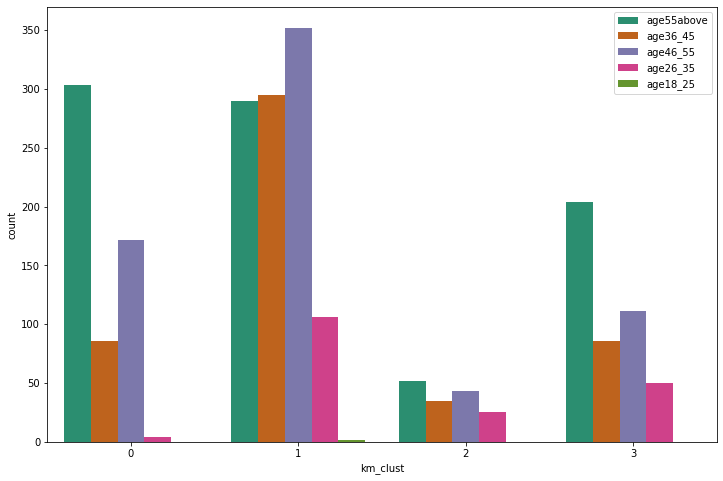

In [100]:
plt.figure(figsize=(12,8))
ax =sns.countplot(hue=data1['Age_group'], x= data1['km_clust'], palette='Dark2');
ax.legend(loc='upper right')

Cluster 0: Elder age(above 55 years) customers are more

Cluster 1: Middle age customers are more (46-55)

Cluster 2: Almost equally all age group customers are there.

Cluster 3: Elder age(above 55 years) customers are more

**Inference :** No customers of age below 18 years, Customers of 26-35 are also less, Maximum customers are of age more than 35 years,out of which customers of age above 55 years are more  

# **Final Conclusion**

**Cluster-0**: Average income & average spending,
Average income & more no. of purchase,
Elder age(above 55 years) customers are more



**Cluster 1**: Low income & low spending,
Low income & less no. of purchase,
Middle age customers are more (46-55)


**Cluster 2**: High income & high spending group,
High income & average no. of purchase,
Most peoples do not have children,
Almost equally all age group customers are there.
It is having customers with highest individual spent

**Cluster 3**: High income & average spending,
High income & more no. of purchase,
Most peoples do not have children,
Elder age(above 55 years) customers are more
 


**General conclusion :** 
1. Promotion campaigns does not effected customers.
2. No customers are of age below 18 years, Customers of 26-35 are also less, Maximum customers are of age more than 35 years,out of which customers of age above 55 years are more.
3. For low income & low spending peoples more discounts can be given
4. For high income & high spend, inventory of branded products can be increased.
